<a href="https://colab.research.google.com/github/Pham223phuong/python-mini-projects/blob/master/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%%time
train = pd.read_excel('/content/drive/MyDrive/ATTACKER/FINAL_train_attacker.xlsx')

CPU times: user 37.7 s, sys: 565 ms, total: 38.3 s
Wall time: 39.6 s


In [ ]:
print(train)

          id  label  time_trans        time_1_fixed                   time_1  \
0      11651      0         NaN                 NaT                      NaN   
1      48491      0         NaN                 NaT                      NaN   
2      42868      0    0.000000 2017-01-23 18:00:32  2017-01-23T18:00:32.69Z   
3      68835      1         NaN                 NaT                      NaN   
4      73688      1         NaN                 NaT                      NaN   
...      ...    ...         ...                 ...                      ...   
48025  89571      0  643.028611 2019-08-30 01:08:24     2019-08-30T01:08:24Z   
48026  89621      0         NaN                 NaT                      NaN   
48027  89649      0         NaN                 NaT                      NaN   
48028  89826      1         NaN                 NaT                      NaN   
48029  89883      0         NaN                 NaT                      NaN   

             time_2_fixed              

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         48030 non-null  int64         
 1   label                      48030 non-null  int64         
 2   time_trans                 22991 non-null  float64       
 3   time_1_fixed               22991 non-null  datetime64[ns]
 4   time_1                     22991 non-null  object        
 5   time_2_fixed               22991 non-null  datetime64[ns]
 6   time_2                     22991 non-null  object        
 7   cat_1                      22991 non-null  float64       
 8   cat_2                      22991 non-null  float64       
 9   cat_3                      22991 non-null  float64       
 10  cat_5                      22991 non-null  float64       
 11  date_1                     14139 non-null  object        
 12  mul_

In [ ]:
def check_value(train):
        zero_val = (train == 0.00).astype(int).sum(axis=0)
        mis_val = train.isnull().sum()
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% Missing'})
        # mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        # mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = train.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% Missing', ascending=False).round(1)
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns and " + str(train.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [ ]:
Missing_values_table = check_value(train)
train_null_tables= Missing_values_table.loc[Missing_values_table['% Missing'] > 30]
train_null_tables['Unique'] = [train[col].nunique() for col in train_null_tables.index ]
print (train_null_tables)

Your selected dataframe has 59 columns and 48030 Rows.
There are 54 columns that have missing values.
                        Zero Values  Missing Values  % Missing  \
trans_currency                    0           35135       73.2   
date_1                            0           33891       70.6   
unknown_var_17                    0           29501       61.4   
unknown_var_4                     0           27326       56.9   
date_3                            0           27136       56.5   
social_sex_info                8593           26972       56.2   
unknown_var_20                  558           26625       55.4   
unknown_var_19                10200           26625       55.4   
unknown_var_18                    0           26625       55.4   
social_subcriber_count        16636           26386       54.9   
social_friend_count            8368           26386       54.9   
com_type                          0           26287       54.7   
cat_12                            0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
trans_currency,35135,0.731522
date_1,33891,0.705621
unknown_var_17,29501,0.614220
unknown_var_4,27326,0.568936
date_3,27136,0.564980


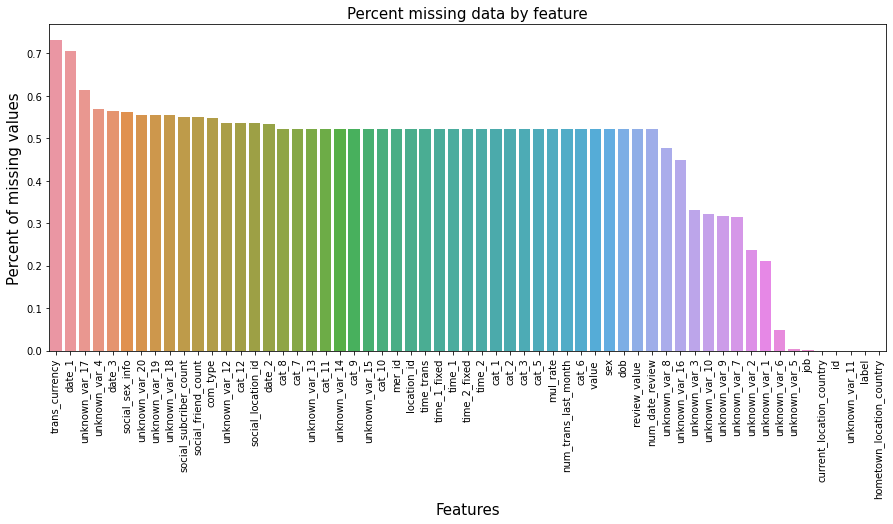

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()